   group  gender  ft  djs   wbc  neut  ast   tbil  alp   afp   cea    ca199  \
0      1       1   1    1   5.2  43.5   44   10.2   64  3.70  0.97    25.30   
1      1       1   1    0   7.2  71.8   17   15.6   44  4.90  3.61  2115.00   
2      1       1   1    0  13.4  44.8   17    9.5   71  4.10  1.89    38.65   
3      2       2   1    1   8.0  47.4   17    6.7  124  1.38  1.88   121.50   
4      1       2   1    0   0.0  63.2   24  385.6  228  2.99  3.10    51.74   

   size  masssize  stone  incrassation  age1  
0   986         2      0           0.0    78  
1  6313         2      0           0.0    53  
2   850         2      0           0.0    59  
3  3002         0      1           1.0    72  
4   896         0      0           1.0    63  
Model accuracy: 0.80
Cross-validation scores: [0.79166667 0.83333333 0.79166667 0.81052632 0.73684211]
Mean cross-validation score: 0.79
masssize: 0.194
cea: 0.106
size: 0.086
alp: 0.084
neut: 0.083
ca199: 0.082
ast: 0.062
age1: 0.060
tbil: 0.

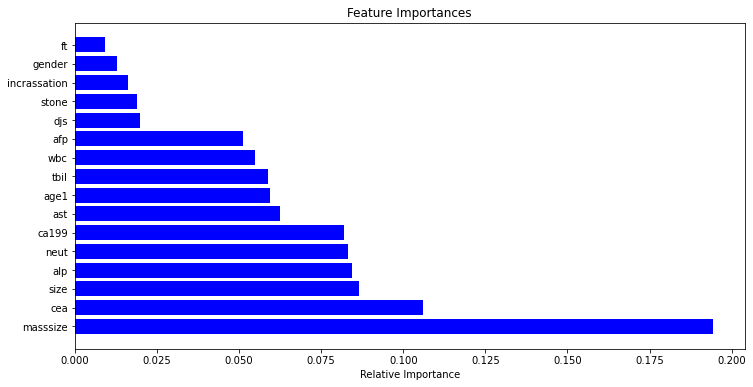

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('课后作业.csv')

# 显示数据的前几行以检查是否正确加载
print(data.head())

# 提取特征和目标变量
X = data.drop('group', axis=1)
y = data['group']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器模型
model = RandomForestClassifier(random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 评估模型性能
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

# 使用5折交叉验证评估模型
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

# 获取特征重要性
importances = model.feature_importances_
indices = (-importances).argsort()

# 打印特征重要性
for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.3f}")

# 可视化特征重要性
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('课后作业.csv')

# 显示数据的前几行以检查是否正确加载
print(data.head())

# 提取特征和目标变量
X = data.drop('group', axis=1)
y = data['group']

# 检查是否有缺失值
print("Missing values in each column:")
print(X.isnull().sum())

# 定义数值型和分类型特征
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 创建预处理器
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # 使用均值填充缺失值
    ('scaler', StandardScaler())  # 标准化
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # 填充缺失值
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 独热编码
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 创建完整的机器学习管道
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 评估模型性能
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

# 使用5折交叉验证评估模型
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

# 获取特征重要性
# 注意：由于我们使用了Pipeline和ColumnTransformer，直接获取特征重要性需要额外处理
# 这里我们假设所有特征都已经经过处理并且可以按顺序访问
feature_names = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

importances = model.named_steps['classifier'].feature_importances_
indices = (-importances).argsort()

# 打印特征重要性
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.3f}")

# 可视化特征重要性
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

   group  gender  ft  djs   wbc  neut  ast   tbil  alp   afp   cea    ca199  \
0      1       1   1    1   5.2  43.5   44   10.2   64  3.70  0.97    25.30   
1      1       1   1    0   7.2  71.8   17   15.6   44  4.90  3.61  2115.00   
2      1       1   1    0  13.4  44.8   17    9.5   71  4.10  1.89    38.65   
3      2       2   1    1   8.0  47.4   17    6.7  124  1.38  1.88   121.50   
4      1       2   1    0   0.0  63.2   24  385.6  228  2.99  3.10    51.74   

   size  masssize  stone  incrassation  age1  
0   986         2      0           0.0    78  
1  6313         2      0           0.0    53  
2   850         2      0           0.0    59  
3  3002         0      1           1.0    72  
4   896         0      0           1.0    63  
Missing values in each column:
gender          0
ft              0
djs             0
wbc             0
neut            0
ast             0
tbil            0
alp             0
afp             0
cea             0
ca199           0
size          

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Missing values in each column:
gender          0
ft              0
djs             0
wbc             0
neut            0
ast             0
tbil            0
alp             0
afp             0
cea             0
ca199           0
size            0
masssize        0
stone           0
incrassation    1
age1            0
dtype: int64
Model accuracy: 0.79
Cross-validation scores: [0.79166667 0.82291667 0.80208333 0.81052632 0.73684211]
Mean cross-validation score: 0.79
masssize: 0.194
cea: 0.106
size: 0.087
neut: 0.083
alp: 0.083
ca199: 0.082
ast: 0.062
age1: 0.060
tbil: 0.058
wbc: 0.056
afp: 0.052
djs: 0.020
stone: 0.018
incrassation: 0.016
gender: 0.013
ft: 0.009


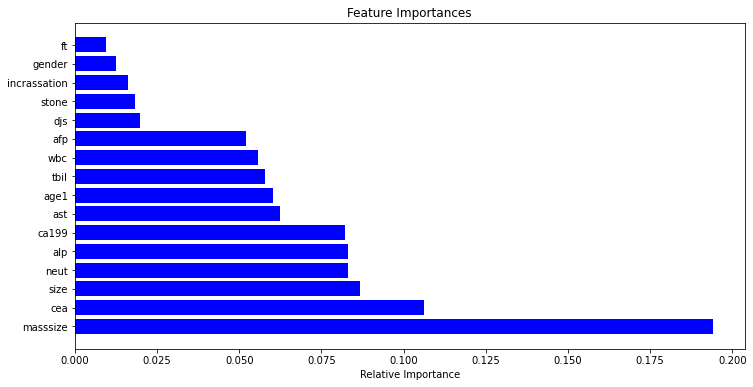

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('课后作业.csv')

# 提取特征和目标变量
X = data.drop('group', axis=1)
y = data['group']

# 检查是否有缺失值
print("Missing values in each column:")
print(X.isnull().sum())

# 定义数值型和分类型特征
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 创建预处理器
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # 使用均值填充缺失值
    ('scaler', StandardScaler())  # 标准化
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # 填充缺失值
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 独热编码
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 创建完整的机器学习管道
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 评估模型性能
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

# 使用5折交叉验证评估模型
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

# 获取特征重要性
# 注意：由于我们使用了Pipeline和ColumnTransformer，直接获取特征重要性需要额外处理
# 这里我们假设所有特征都已经经过处理并且可以按顺序访问

# 获取独热编码后的特征名称
# 首先，我们需要拟合并转换训练数据以获取编码后的特征名称
X_train_preprocessed = model.named_steps['preprocessor'].fit_transform(X_train)

# 获取数值型特征的名称
numeric_feature_names = numeric_features

# 获取独热编码后的分类型特征名称
if len(categorical_features) > 0:
    categorical_feature_names = list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
else:
    categorical_feature_names = []

# 合并所有特征名称
feature_names = numeric_feature_names + categorical_feature_names

# 获取特征重要性
importances = model.named_steps['classifier'].feature_importances_
indices = (-importances).argsort()

# 打印特征重要性
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.3f}")

# 可视化特征重要性
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()